In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '.2'
plt.rcParams['axes.facecolor'] = 'black'

In [2]:
def lift(arr):
    arr = np.array(arr)
    return arr.reshape((arr.shape[0], 1))


grades = np.array([[11, 8, 15, 6, 9, 12, 6, 6, 12, 9, 3, 14, 11, 14, 6, 6, 8, 12, 3, 9, 12],
                   [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]])  

data = np.c_[grades[0,:], grades[1,:]]
data[:, 1]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [3]:
X = data[:, 0]
Y = data[:, 1]


s = list(map(lambda x, y: 30 * len(X[(X == x) & (Y == y)]), X, Y))
s

[30,
 30,
 30,
 120,
 60,
 30,
 120,
 120,
 90,
 60,
 60,
 60,
 30,
 60,
 30,
 120,
 30,
 90,
 60,
 30,
 90]

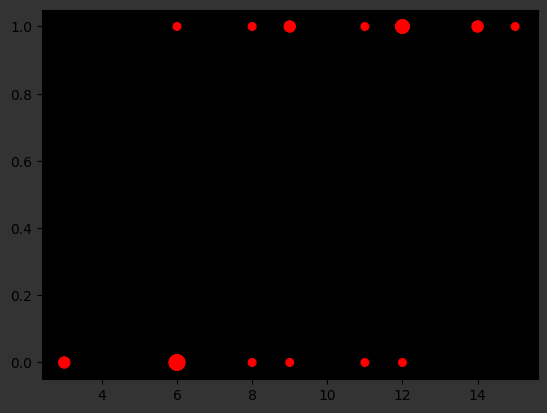

In [4]:
plt.scatter(X,Y ,c='r', s=s)
plt.show()

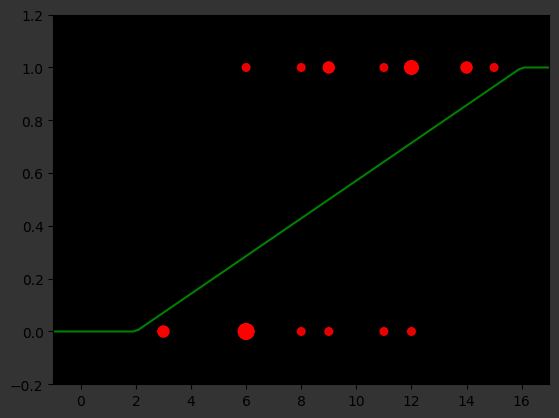

In [5]:
def prob(grade):
    if grade > 16:
        return 1
    if grade < 2:
        return 0
    return 1/14 * grade - 1/7

g = np.linspace(-1,17,100)

plt.axis([-1,17,-0.2,1.2])
plt.plot(g, list(map(prob,g)), color='green')
plt.scatter(X,Y ,c='r', s=s, alpha= .9)
plt.show()

In [6]:
probX = np.array(list(map(prob, X)))
probX

array([0.64285714, 0.42857143, 0.92857143, 0.28571429, 0.5       ,
       0.71428571, 0.28571429, 0.28571429, 0.71428571, 0.5       ,
       0.07142857, 0.85714286, 0.64285714, 0.85714286, 0.28571429,
       0.28571429, 0.42857143, 0.71428571, 0.07142857, 0.5       ,
       0.71428571])

In [7]:
probGrades = np.array(list(map(prob,np.arange(1,16))))
probGrades

array([0.        , 0.        , 0.07142857, 0.14285714, 0.21428571,
       0.28571429, 0.35714286, 0.42857143, 0.5       , 0.57142857,
       0.64285714, 0.71428571, 0.78571429, 0.85714286, 0.92857143])

In [8]:
#prob for each grade 
{i: probGrades[i-1] for i in range(1,16)}

{1: 0.0,
 2: 0.0,
 3: 0.07142857142857142,
 4: 0.14285714285714285,
 5: 0.21428571428571425,
 6: 0.2857142857142857,
 7: 0.35714285714285715,
 8: 0.42857142857142855,
 9: 0.49999999999999994,
 10: 0.5714285714285714,
 11: 0.6428571428571428,
 12: 0.7142857142857142,
 13: 0.7857142857142856,
 14: 0.8571428571428572,
 15: 0.9285714285714286}

In [9]:
Y_predict = (probX >= .5) * 1
Y_predict

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [10]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [11]:
np.sum(Y_predict == Y)

15

In [12]:
def predictor(boundary):
    def inner_func(grade):
        return 1 if grade >= boundary else 0
    return inner_func

def predictor(boundary):
    return lambda grade: 1 if grade >= boundary else 0

predictor = lambda boundary: lambda grade: 1 if grade >= boundary else 0

In [13]:
for b in range(0, 16):
    print(b, np.sum(np.array(list(map(predictor(b), X))) == Y))

0 11
1 11
2 11
3 11
4 13
5 13
6 13
7 16
8 16
9 16
10 15
11 15
12 15
13 13
14 13
15 11


In [28]:
X

array([11,  8, 15,  6,  9, 12,  6,  6, 12,  9,  3, 14, 11, 14,  6,  6,  8,
       12,  3,  9, 12])

In [29]:
Y

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [14]:
pX = np.array(list(map(prob, X)))
pX

array([0.64285714, 0.42857143, 0.92857143, 0.28571429, 0.5       ,
       0.71428571, 0.28571429, 0.28571429, 0.71428571, 0.5       ,
       0.07142857, 0.85714286, 0.64285714, 0.85714286, 0.28571429,
       0.28571429, 0.42857143, 0.71428571, 0.07142857, 0.5       ,
       0.71428571])

In [31]:
#comparing the models predictions to the actual grades data
like = Y * pX + (1 - Y) * (1 - pX)

In [16]:
np.prod(like)

3.2016337809171925e-05

In [17]:
#coinflip estimation
1 / (2**21)

4.76837158203125e-07

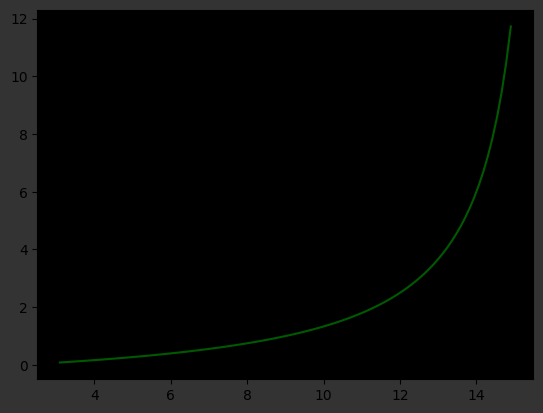

In [32]:
def odds(grade):
    return prob(grade) / (1 - prob(grade))
g = np.linspace(3.1, 14.9, 100)
plt.plot(g, list(map(odds, g)), color='green', alpha=.7)

In [ ]:
x = np.array([[2, -.5],
              [1, .25]])
x

In [ ]:
x_inverse = np.linalg.inv(x)

In [ ]:
x @ x_inverse

In [ ]:
x_inverse @ x

In [ ]:
! jt -T

In [ ]:
%magic

In [ ]:
! jt -l

In [ ]:
! jt -t monokai

In [ ]:
! jt -h